# Stage 1: Data loading and analysis

In [2]:
# ===== Standard Library =====
import sys
sys.path.append("../src")

# ===== Third-Party Libraries =====
import matplotlib.pyplot as plt
import librosa

# ===== Local Modules =====
from audio.io import load_wav_scipy as load_audio
from audio.visualizations import (
    plot_spectrogram,
    plot_waveform
)

from metadata.loading import load_datasets
from metadata.visualization import (
    crosstab_heatmap as make_crosstab_heatmap,
    plot_category_histograms as plot_histograms,
)

from features.mel import compute_mel_spectrogram as mel_spectrogram

In [2]:
datasets = load_datasets()

print(f'\nDatasets: {list(datasets.keys())}')
datasets['heart_data'].head()

Loaded 50 entries from /Users/xanderyoon/School/Fall '25/ISYE 6416/Final Project copy/data/heart_sounds/HS.csv
Loaded 50 entries from /Users/xanderyoon/School/Fall '25/ISYE 6416/Final Project copy/data/lung_sounds/LS.csv
Loaded 145 entries from /Users/xanderyoon/School/Fall '25/ISYE 6416/Final Project copy/data/mixed_sounds/heart_ref/Mix_HS.csv
Loaded 145 entries from /Users/xanderyoon/School/Fall '25/ISYE 6416/Final Project copy/data/mixed_sounds/lung_ref/Mix_LS.csv
Loaded 145 entries from /Users/xanderyoon/School/Fall '25/ISYE 6416/Final Project copy/data/mixed_sounds/mixed_ref/Mix.csv

Datasets: ['heart_data', 'lung_data', 'mix_heart_data', 'mix_lung_data', 'mixed_data']


,gender,heart_sound_type,location,heart_sound_id,filename
0,F,Normal,RC,F_N_RC,../data/heart_sounds/wav/F_N_RC.wav
1,F,Normal,LC,F_N_LC,../data/heart_sounds/wav/F_N_LC.wav
2,M,Normal,RUSB,M_N_RUSB,../data/heart_sounds/wav/M_N_RUSB.wav
3,F,Normal,LUSB,F_N_LUSB,../data/heart_sounds/wav/F_N_LUSB.wav
4,F,Normal,LLSB,F_N_LLSB,../data/heart_sounds/wav/F_N_LLSB.wav


## Exploratory data analysis

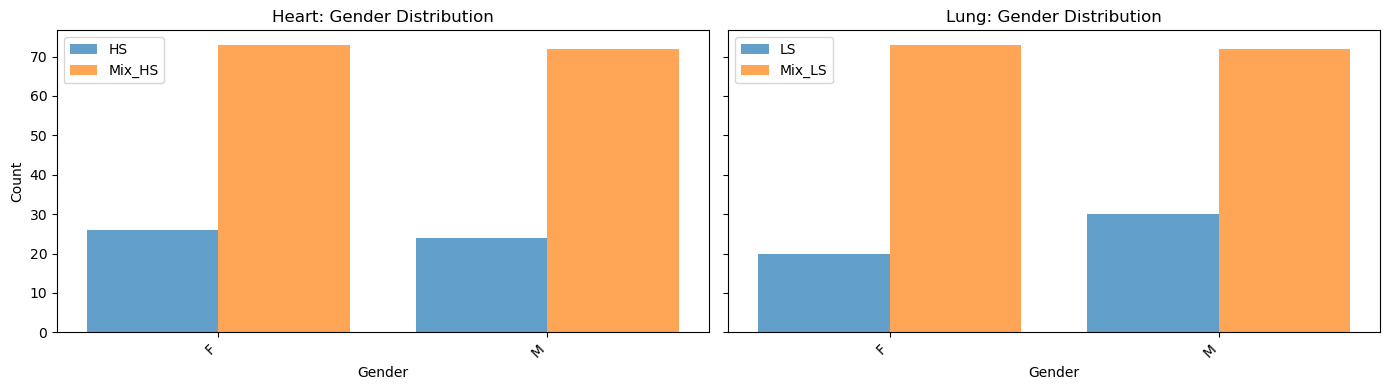

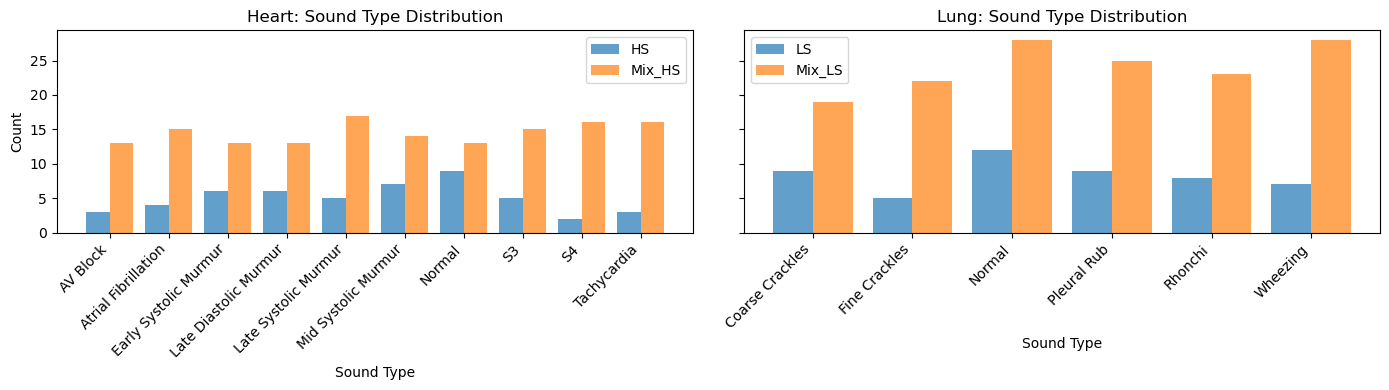

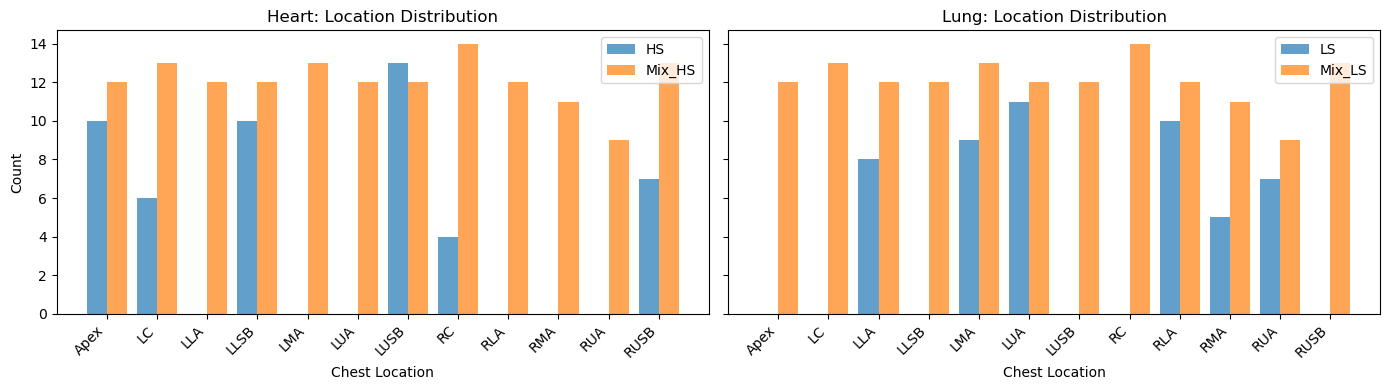

In [3]:
hs = datasets['heart_data']
ls = datasets['lung_data']

mix_hs = datasets['mix_heart_data']
mix_ls = datasets['mix_lung_data']

# Gender 
plot_histograms(
    hs["gender"], mix_hs["gender"],
    ls["gender"], mix_ls["gender"],
    title_suffix="Gender Distribution",
    x_label="Gender"
)

# Heart/Lung sound type
plot_histograms(
    hs["heart_sound_type"],   mix_hs["heart_sound_type"],
    ls["lung_sound_type"],    mix_ls["lung_sound_type"],
    title_suffix="Sound Type Distribution",
    x_label="Sound Type"
)

# Recording Location
plot_histograms(
    hs["location"], mix_hs["location"],
    ls["location"], mix_ls["location"],
    title_suffix="Location Distribution",
    x_label="Chest Location"
)


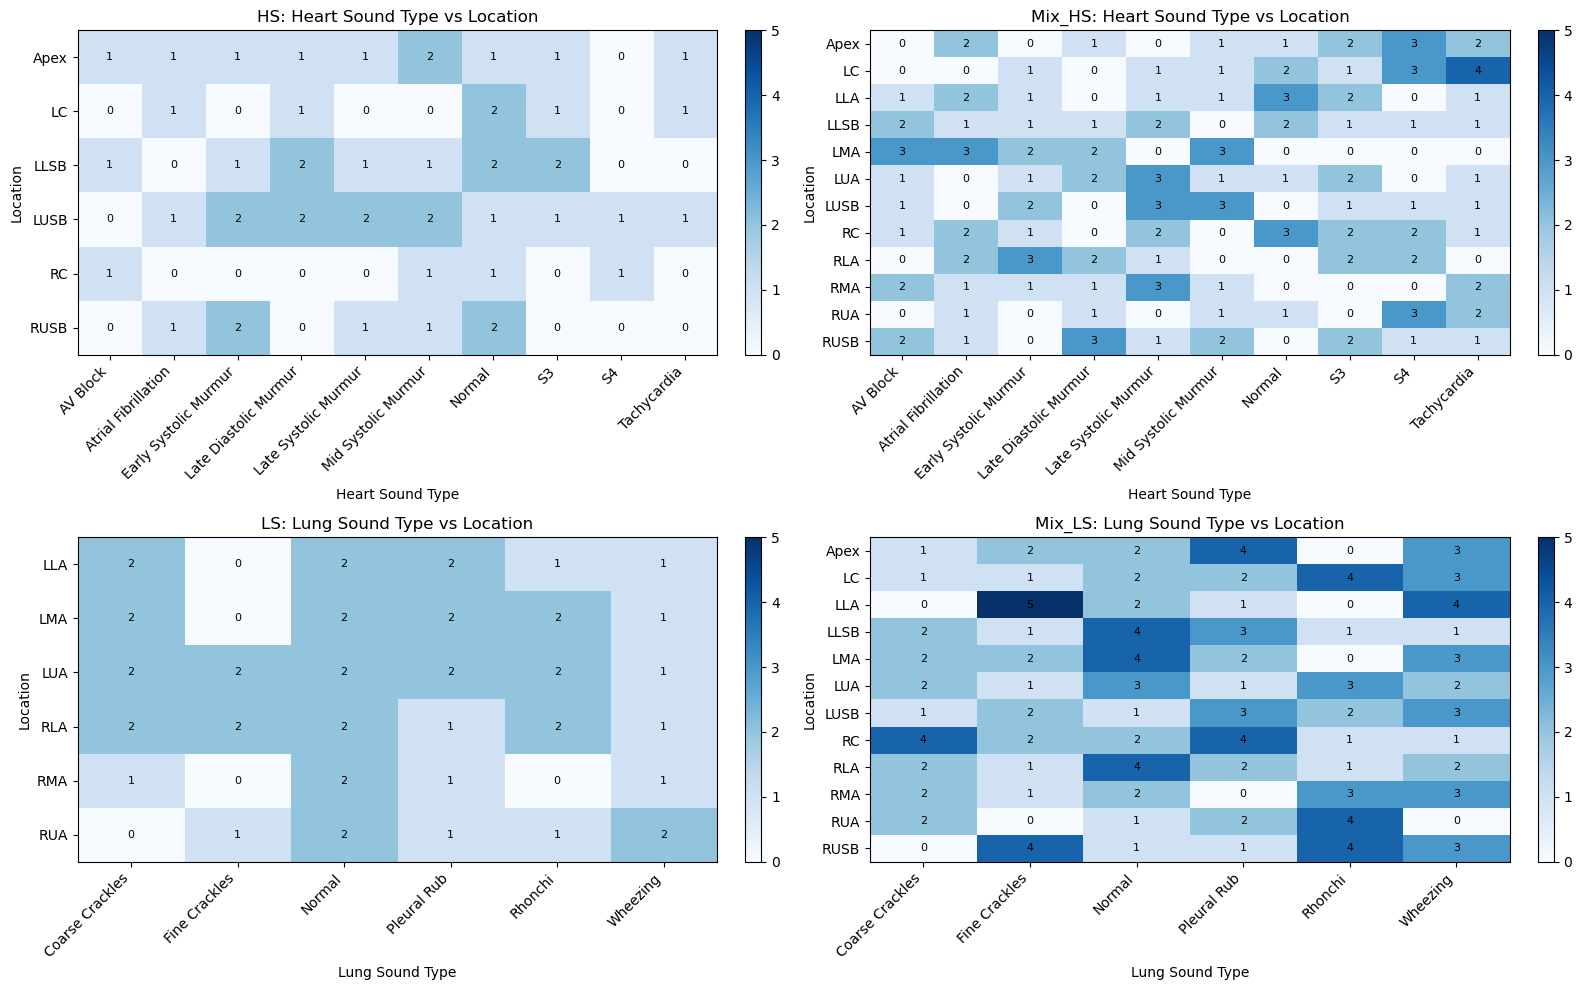

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 3.1 Heart: HS
make_crosstab_heatmap(
    axes[0,0],
    x_series=hs["heart_sound_type"],
    y_series=hs["location"],
    title="HS: Heart Sound Type vs Location",
    x_label="Heart Sound Type",
    y_label="Location"
)

# 3.2 Heart: Mix_HS
make_crosstab_heatmap(
    axes[0,1],
    x_series=mix_hs["heart_sound_type"],
    y_series=mix_hs["location"],
    title="Mix_HS: Heart Sound Type vs Location",
    x_label="Heart Sound Type",
    y_label="Location"
)

# 3.3 Lung: LS
make_crosstab_heatmap(
    axes[1,0],
    x_series=ls["lung_sound_type"],
    y_series=ls["location"],
    title="LS: Lung Sound Type vs Location",
    x_label="Lung Sound Type",
    y_label="Location"
)

# 3.4 Lung: Mix_LS
make_crosstab_heatmap(
    axes[1,1],
    x_series=mix_ls["lung_sound_type"],
    y_series=mix_ls["location"],
    title="Mix_LS: Lung Sound Type vs Location",
    x_label="Lung Sound Type",
    y_label="Location"
)

plt.tight_layout()
plt.show()

## Audio visualization

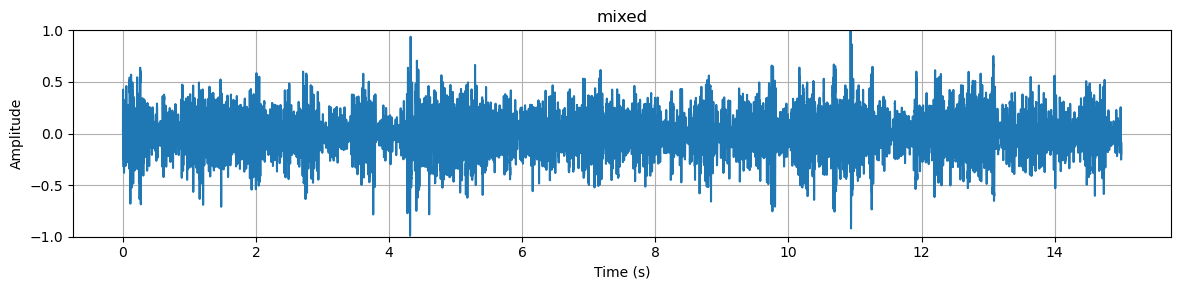

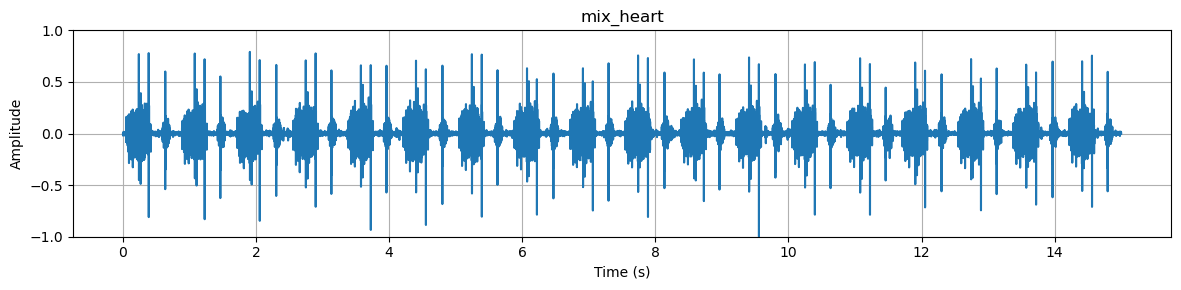

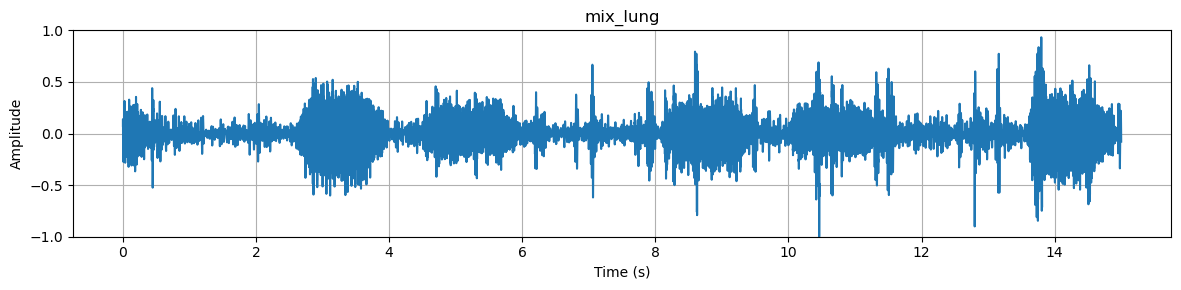

In [23]:
sample_paths = {
    "mixed": datasets['mixed_data'].iloc[0]['mixture_file'],
    "mix_heart": datasets['mix_heart_data'].iloc[0]['heart_ref_file'],
    "mix_lung": datasets['mix_lung_data'].iloc[0]['lung_ref_file']
}

loaded_audios = {}
global_min = float('inf')
global_max = float('-inf')

for source, path in sample_paths.items():
    sr, audio = load_audio(path, normalize=True)
    loaded_audios[source] = (sr, audio)
    global_min = min(global_min, audio.min())
    global_max = max(global_max, audio.max())


# --- Use the SAME y-scale for all plots ---
for source, (sr, audio) in loaded_audios.items():
    plot_waveform(audio, sr, title=source, y_limits=(global_min, global_max))


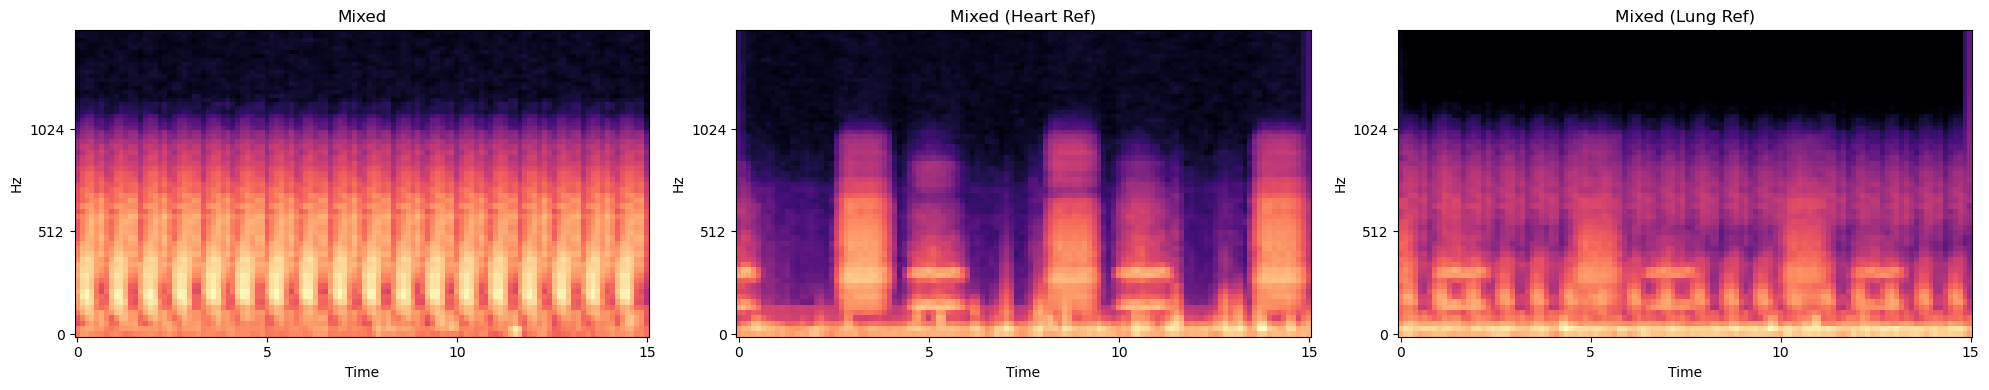

In [11]:
sample_paths = {
    "mix_heart": datasets['mix_heart_data'].iloc[0]['heart_ref_file'],
    "mix_lung": datasets['mix_lung_data'].iloc[0]['lung_ref_file'],
    "mixed": datasets['mixed_data'].iloc[0]['mixture_file']
}
sample_paths

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

titles = ["Mixed", "Mixed (Heart Ref)", "Mixed (Lung Ref)"]
for ax, (name, path), title in zip(axes, sample_paths.items(), titles):
    sr, x = load_audio(path)
    S = mel_spectrogram(x, sr)

    img = librosa.display.specshow(S, sr=sr, x_axis="time", y_axis="mel",
                                   ax=ax, cmap="magma")
    ax.set_title(title)

plt.tight_layout()
plt.show()